# Projekt Adsorptionskolonnenreaktor
Wir machen unsere erste simulation für folgendes problem:
Wir haben eine Adsorptionskolonnenreaktor welche Feuchte Luft trocknet
Hierzu wird feuchte Luft über ein "Bett" aus trockenem Absorber geleitet
Wir wollen nun simulieren wie das Wasser in den Absorber diffundiert.
Wir gehen hierzu in einfachen Teilschritten vor:

In [175]:
# initiale Situation festlegen. 
# Hierzu betrachten wir einen 2D reaktor wecher auf 10x10 zellen besteht. 
# Alle diese Zellen sind initial trocken - haben also 0 wasser. 
# Die oberste Zelle soll nun unser Wasserreservoir sein. Füllen Sie die oberste zelle mit Einsen.
import numpy as np
import matplotlib.pyplot as plt
concentration = np.zeros([10, 10])
concentration[0, :] = 1
print(concentration)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


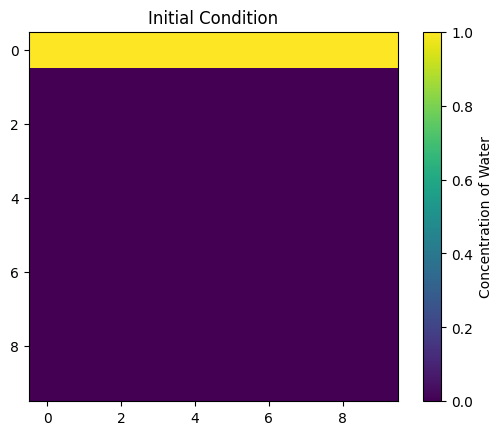

In [176]:
# plotten sie den initialien zustand
plt.imshow(concentration)
plt.title("Initial Condition")
plt.colorbar(label="Concentration of Water")
plt.show()

In [177]:
# schreiben Sie eine funktion welche eine 10x10 matrix aufnimmt und einen diffusionsschritt vornimmt
# diffusion geschieht hier modellweise horizontal und vertikal also für Zelle z
def diffusion_step(matrix):
    new_matrix = matrix.copy()  # copy of the 10x10 matrix

# if abfragen, ob i oder j außerhalb von 0-10 sind für i+-1, j+-1
    for j in range(10):  # Zeilen (vertikal)
        for i in range(10):  # Spalten (horizontal)
            a = b = c = d = 0  # Nachbarwerte initialisieren
            
            # Nachbarn prüfen und Werte berechnen
            if j-1 >= 0:  # untere Nachbarzelle
                a = matrix[j-1, i]
            if j+1 < 10:  # obere Nachbarzelle
                b = matrix[j+1, i]
            if i-1 >= 0:  # linke Nachbarzelle
                c = matrix[j, i-1]
            if i+1 < 10:  # rechte Nachbarzelle
                d = matrix[j, i+1]

            # Summe der Nachbarn berechnen
            temp = a + b + c + d

            # Neuen Wert berechnen und speichern
            new_matrix[j, i] = 0.25 * temp  # Durchschnitt der Nachbarn

    return new_matrix

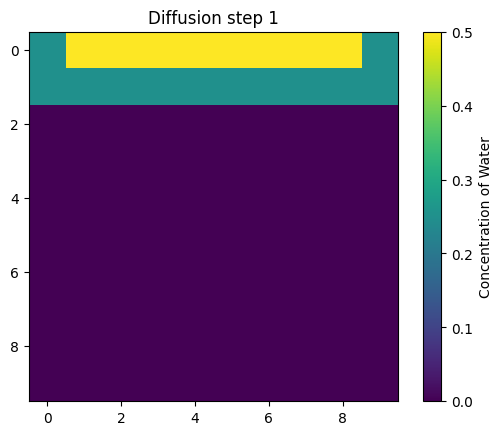

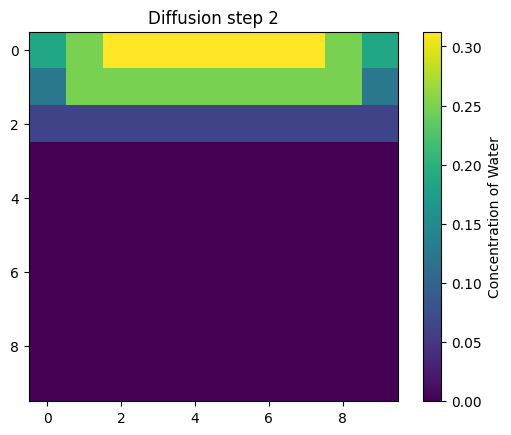

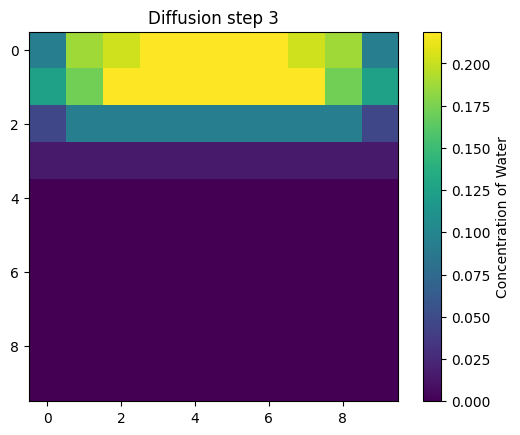

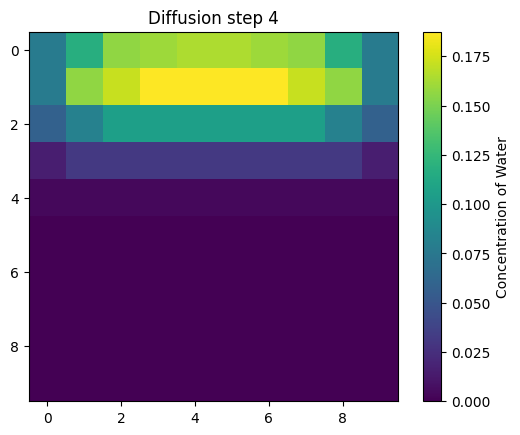

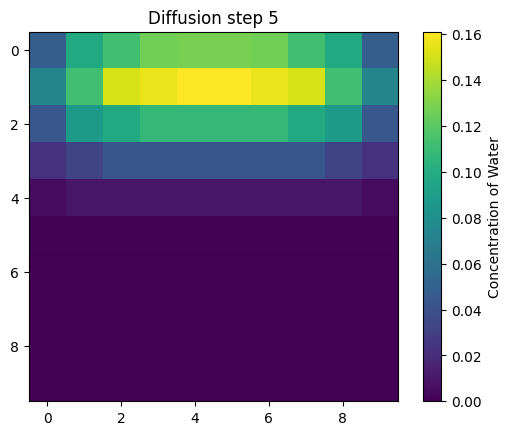

In [178]:
# wir führen schritte aus mit unserer oben definierten funktion
steps = 5
current_matrix = concentration.copy()

for step in range(steps):
    current_matrix = diffusion_step(current_matrix)
    plt.imshow(current_matrix)
    plt.title(f"Diffusion step {step+1}")
    plt.colorbar(label="Concentration of Water")
    plt.show()